<h1><font color='blue'>Lending Club</font></h1>

In [28]:
# Import the python environment libraries
import sklearn
import numpy as np
import pandas as pd
#import seaborn as sb
#from sklearn.linear_model import SGDClassifier
#from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
import collections
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
%matplotlib inline

In [29]:
# Import the data 
data = pd.read_csv("data.csv", parse_dates = [1])

#Adding additional dates to the dataframe 
df_date_split = pd.DatetimeIndex(data['issue_d'])
data['issue_year'] = df_date_split.year
data['issue_month'] = df_date_split.month

# Setting the initial features
df_features = data.copy()
del df_features['id']
del df_features['new_int_rate']
del df_features['issue_d']


# Preview the data
data.head(1)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,new_int_rate,target,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,B,B2,...,0.0,0.0,42384,171.62,42659,0,11,2,2016,12


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41034 entries, 0 to 41033
Data columns (total 46 columns):
id                         41034 non-null int64
member_id                  41034 non-null object
loan_amnt                  41034 non-null int64
funded_amnt                41034 non-null int64
funded_amnt_inv            41034 non-null float64
term                       41034 non-null int64
int_rate                   41034 non-null float64
installment                41034 non-null float64
grade                      41034 non-null object
sub_grade                  41034 non-null object
emp_length                 41034 non-null int64
home_ownership             41034 non-null object
annual_inc                 41034 non-null float64
verification_status        41034 non-null object
issue_d                    41034 non-null object
loan_status                41034 non-null object
pymnt_plan                 41034 non-null object
purpose                    41034 non-null object
zip_code  

In [31]:
data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,zip_code,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,new_int_rate,target,issue_year,issue_month
count,4.103400e+04,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,4.103400e+04,41034.000000,...,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.0,41034.000000
mean,6.803563e+05,11165.055198,10892.249720,10410.807692,42.421992,0.121650,323.607605,4.955500,6.931481e+04,50182.273237,...,98.520570,13.321207,42550.677414,2663.782731,42588.558464,0.045182,12.156748,1.883852,2016.0,7.190574
std,2.051338e+05,7436.656392,7168.313752,7094.097797,10.624903,0.037359,208.869736,3.460698,6.356160e+04,32869.554989,...,699.759165,153.860237,104.625030,4424.451962,97.330115,0.208642,3.729718,0.748982,0.0,3.365688
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,0.054200,15.670000,0.000000,3.300000e+03,700.000000,...,0.000000,0.000000,42378.000000,0.010000,42378.000000,0.000000,5.000000,1.000000,2016.0,1.000000
25%,5.115498e+05,5400.000000,5200.000000,5000.000000,36.000000,0.096200,166.500000,2.000000,4.080000e+04,20000.000000,...,0.000000,0.000000,42469.000000,216.590000,42505.000000,0.000000,10.000000,1.000000,2016.0,4.000000
50%,6.551805e+05,9975.000000,9600.000000,8975.000000,36.000000,0.119900,278.530000,4.000000,5.927800e+04,45000.000000,...,0.000000,0.000000,42562.000000,545.645000,42655.000000,0.000000,12.000000,2.000000,2016.0,7.000000
75%,8.324275e+05,15000.000000,15000.000000,14400.000000,60.000000,0.147400,429.695000,9.000000,8.300000e+04,85000.000000,...,0.000000,0.000000,42653.000000,3268.897500,42659.000000,0.000000,15.000000,2.000000,2016.0,10.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,0.245900,1305.190000,10.000000,6.000000e+06,99900.000000,...,29623.350000,7002.190000,42719.000000,36115.200000,42719.000000,2.000000,25.000000,4.000000,2016.0,12.000000


In [32]:
data['grade'].value_counts()

B    12077
A    10008
C     8402
D     5744
E     3171
F     1196
G      436
Name: grade, dtype: int64

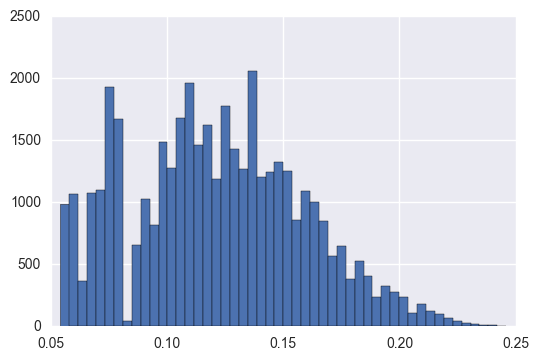

In [33]:
data['int_rate'].hist(bins=50)

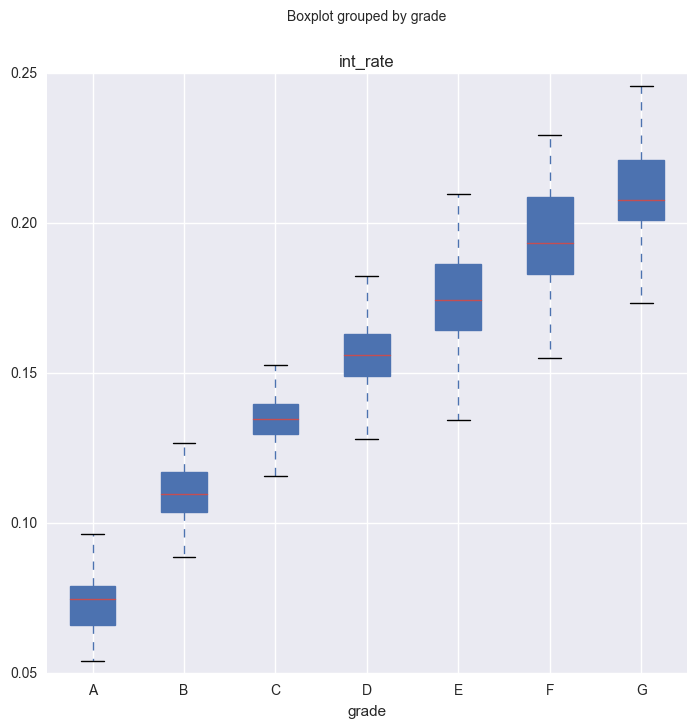

In [34]:
# Boxplot for int_rate over grade
data.boxplot(column="int_rate", by= "grade",figsize= (8,8),patch_artist=True)
plt.style.use('ggplot')

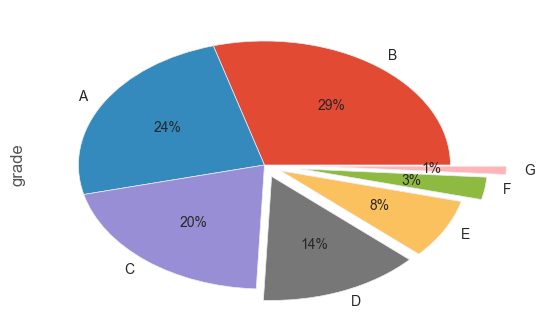

In [35]:
# Pie chart representing grade distributions
explode = (0,0,0,0.1,0.1,0.2,0.3)
data['grade'].value_counts().plot.pie(explode=explode, autopct='%1.0f%%',)


In [36]:
# What columns do we have?
print("{} columns: {}".format(len(data.columns), data.columns))

46 columns: Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_length', u'home_ownership', u'annual_inc', u'verification_status',
       u'issue_d', u'loan_status', u'pymnt_plan', u'purpose', u'zip_code',
       u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line',
       u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util',
       u'total_acc', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_d', u'last_pymnt_amnt', u'last_credit_pull_d',
       u'pub_rec_bankruptcies', u'new_int_rate', u'target', u'issue_year',
       u'issue_month'],
      dtype='object')


In [37]:
# Hash the dataset until we determine columns that require it

data['grade'] = data['grade'].apply(hash)
data['sub_grade'] = data['sub_grade'].apply(hash)
data['home_ownership'] = data['home_ownership'].apply(hash)
data['verification_status'] = data['verification_status'].apply(hash)
data['loan_status'] = data['loan_status'].apply(hash)
data['pymnt_plan'] = data['pymnt_plan'].apply(hash)
data['purpose'] = data['purpose'].apply(hash)
data['addr_state'] = data['addr_state'].apply(hash)




In [38]:
feature_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment', #'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
       'loan_status', 'pymnt_plan', 
       'purpose', 
       'zip_code', 'addr_state', 
       'dti', #'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 
       'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', #'new_int_rate', 'int_bucket', 
       'issue_year','issue_month'
        ]

target_col = 'int_rate'


# Extract desired features and target column
X = data[feature_cols]
Y = np.asarray(data['int_rate'], dtype="|S6")

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("Top 10 important features:")
print(feature_imps[:10])

[  3.33361393e-02   3.34259782e-02   3.89290752e-02   4.52484697e-03
   5.04622163e-02   3.76589915e-02   2.54654839e-02   3.91479324e-02
   2.11721449e-02   7.47316836e-03   7.77875862e-06   3.22051634e-02
   4.00014676e-02   3.66741158e-02   4.01991709e-02   3.15445060e-02
   3.85550450e-02   5.11183763e-03   3.79946131e-02   4.66722516e-02
   3.91563901e-02   7.00707788e-04   7.28016302e-04   4.30804312e-02
   4.12129910e-02   3.36047862e-02   5.38473831e-02   6.91119387e-03
   7.11908516e-03   5.90446454e-03   4.13502630e-02   4.09083934e-02
   3.34021649e-02   3.98170491e-03   0.00000000e+00   4.75300978e-02]
Top 10 important features:
            feature  importance
26    total_rec_int    0.053847
4       installment    0.050462
35      issue_month    0.047530
19       revol_util    0.046672
23      total_pymnt    0.043080
30     last_pymnt_d    0.041350
24  total_pymnt_inv    0.041213
31  last_pymnt_amnt    0.040908
14              dti    0.040199
12         zip_code    0.040001

In [ ]:
# create a base classifier used to evaluate a subset of attributes
model = DecisionTreeClassifier(random_state=42)
names = data[feature_cols]

#rank all features, i.e continue the elimination until the last one
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X,Y)
print(rfe.ranking_)
 
# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X.columns, 'importance': rfe.ranking_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("Top 10 important features:")
print(feature_imps[:10])

In [ ]:
# feature selection using random forest
randomforest = RandomForestClassifier()
randomforest.fit(X, Y)
 
# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X.columns, 'importance': randomforest.feature_importances_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("Top 10 important features:")
print(feature_imps[:10])

In [ ]:
#use this function to randomly select the features
#we should look at a few thousand scenarios as we explore the best scores
def RandomFeatures():
    features = df_features.columns.values.tolist()
    results = list()
    for f in features:
        randomNumber = random.randint(1, 10)
        if randomNumber >= 5:
            results.append(f)
        
    return results


In [24]:
#automated classifier support
'''
model = KNN,LOG_REG, ETC
ts = test size (.4)
'''
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

def PredStats(model,ts):
    
    feature_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment', #'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
       'loan_status', 'pymnt_plan', 
       'purpose', 
       'zip_code', 'addr_state', 
       'dti', #'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 
       'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', #'new_int_rate', 'int_bucket', 
       'issue_year','issue_month'
        ]
    
    X = np.matrix(data[feature_cols])
    y = np.asarray(data['target'])
    
    #train the data
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=ts)

    if model == 'KNN_REG':
        #knn regressor
        knearest_clf = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform') 
        knearest_clf = knearest_clf.fit(X_train, y_train)
        y_pred_class = knearest_clf.predict(X_test)
        cm = ConfusionMatrix(y_test, y_pred_class)
    elif model =='LOG_REG':
        #logistic regression classifier
        logreg = LogisticRegression()
        logreg = logreg.fit(X_train, y_train)
        y_pred_class = logreg.predict(X_test)
        cm = ConfusionMatrix(y_test, y_pred_class)
    elif model =='SGD_CLF':
        #stocastic gradient descent classifier
        sdgclf = linear_model.SGDClassifier()
        sdgclf = sdgclf.fit(X_train, y_train)
        y_pred_class = sdgclf.predict(X_test)
    elif model =='KNN_CLF':
        #knn classifier
        knearest_clf = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform') 
        knearest_clf = knearest_clf.fit(X_train, y_train)
        y_pred_class = knearest_clf.predict(X_test)
    elif model =='BAYES':
        #bayes classifier
        bayes_clf = BernoulliNB()
        #fit classifier
        bayes_clf.fit(X_train, y_train)
        y_pred_class = bayes_clf.predict(X_test)
    else:
        print('Input a correct model')
        #break
        
    #cm.plot()
    print(cm.print_stats())
    if model == 'LOG_REG':
        print('Coefficients: \n',logreg.coef_)
        print('MSE:',metrics.mean_squared_error(y_test,y_pred_class))
        print('Variance score: ' , logreg.score(X,y))
        print('R2 score: ' , metrics.r2_score(X,y))
    elif model == 'KNN_REG':
        print ('KNN Score: ',knearest_clf.score(X,y))
        print('MSE:',metrics.mean_squared_error(y_test,y_pred_class))
        print('Variance score: ' , knearest_clf.score(X,y))
        print('R2 score: ' , metrics.r2_score(X,y))
    elif model == 'SGD_CLF':
        scores = cross_val_score(sdgclf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
    elif model == 'KNN_CLF':
        scores = cross_val_score(knearest_clf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
    elif model == 'BAYES':
        scores = cross_val_score(bayes_clf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
        



In [27]:
# Look for the best score
#for i in range(5):
PredStats("LOG_REG",.4)

Confusion Matrix:

Predicted  1      2  3  4  __all__
Actual                            
1          0   5356  0  0     5356
2          0   7798  0  0     7798
3          0   2971  0  0     2971
4          0    289  0  0      289
__all__    0  16414  0  0    16414


Overall Statistics:

Accuracy: 0.475082246862
95% CI: (0.46741716453416626, 0.48275616239532693)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       1         2         3          4
Population                                16414     16414     16414      16414
P: Condition positive                      5356      7798      2971        289
N: Condition negative                     11058      8616     13443      16125
Test outcome positive                         0     16414         0          0
Test outcome negative                     16414         0     16414      16414
TP: True Positive                             0    

ValueError: y_true and y_pred have different number of output (36!=1)

In [3]:
#purpose of the loan
data.purpose.value_counts()

debt_consolidation    19169
credit_card            5290
other                  4180
home_improvement       3108
major_purchase         2260
small_business         1877
car                    1582
wedding                 972
medical                 727
moving                  604
house                   408
vacation                390
educational             362
renewable_energy        105
Name: purpose, dtype: int64

In [4]:
# purpose of the loan for incoming greater than 100,000
data[data.annual_inc >=100000].purpose.value_counts()

debt_consolidation    2728
credit_card            933
home_improvement       858
other                  545
small_business         395
major_purchase         320
car                    190
wedding                138
medical                114
moving                  85
house                   75
educational             43
vacation                40
renewable_energy        23
Name: purpose, dtype: int64

In [5]:
#purpose of the loan for incoming less than 100,000
data[data.annual_inc < 100000].purpose.value_counts()

debt_consolidation    16441
credit_card            4357
other                  3635
home_improvement       2250
major_purchase         1940
small_business         1482
car                    1392
wedding                 834
medical                 613
moving                  519
vacation                350
house                   333
educational             319
renewable_energy         82
Name: purpose, dtype: int64

In [6]:
# housing
data.home_ownership.value_counts()

RENT        19314
MORTGAGE    18460
OWN          3126
OTHER         134
Name: home_ownership, dtype: int64